Luego de haber realizado ETL vamos a proceder a relizar el Analisis Exploratorio de los datos (EDA)

Teniendo en cuenta que lo que queremos obtener es un sistema de recomendación de peliculas vamos a 
empezar con el EDA


La información que vamos a analizar es un csv de peliculas llamado movies.csv
 

Vamos a proceder con la lectura del dataset. Para lo cual importamos librerias

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


Procedemos a leer los datos

In [3]:
df_peliculas = pd.read_csv ('..\Proyecto individual Henry\Data\movies_dataset (1).csv')

C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\3521688390.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_peliculas = pd.read_csv ('..\Proyecto individual Henry\Data\movies_dataset (1).csv')


Vamos a ver las caracteristicas principales. Nuestro dataset  contaba originalmente con registros 45466 y
24 columnas
Vamos a ver las cinco primeras filas

In [4]:
df_peliculas.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Cuando se llevo a cabo el ETL se elimino las siguientes columnas: 'video', 'imdb_id', 'adult', 'original_title', 'poster_path' y 'homepage'. Es decir que se eliminaron 6 columnas y tambien se  crearon 2 nuevas columnas 'realease_year' y 'return'.Se eliminaron 120 filas en la limpieza. Quedando con 45346 filas y 20 columnas.

Procedemos a analizar cada una de las columnas

In [5]:
df_peliculas= pd.read_csv('..\Proyecto individual Henry\Data\peliculas.csv')

In [6]:
df_peliculas

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801
1,NaN,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000
3,NaN,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45341,NaN,0,"['Drama', 'Action', 'Romance']",30840,en,"Yet another version of the classic epic, with ...",5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,5.7,26.0,1991,0.000000
45342,NaN,0,['Drama'],111109,tl,An artist struggles to finish his work while a...,0.178241,['Sine Olivia'],['Philippines'],2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,9.0,3.0,2011,0.000000
45343,NaN,0,"['Action', 'Drama', 'Thriller']",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,['American World Pictures'],['United States of America'],2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0,2003,0.000000
45344,NaN,0,[],227506,en,"In a small town live two brothers, one a minis...",0.003503,['Yermoliev'],['Russia'],1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0,1917,0.000000


Debemos preparar los datos para el grafico

Cambio del tipo de dato de la columna 'original_language' a str

In [7]:
df_peliculas['original_language']= df_peliculas['original_language'].astype(str)


Cambio del tipo de dato de la columna 'genres_genres' a str

In [8]:
df_peliculas['genres']= df_peliculas['genres'].astype(str)

Procedemos a limpiar columna genres

In [9]:
df_peliculas['genres']=df_peliculas['genres'].str.replace("'","" )
df_peliculas['genres']=df_peliculas['genres'].str.replace(',','' )
df_peliculas['genres']=df_peliculas['genres'].str.replace("[","" )
df_peliculas['genres']=df_peliculas['genres'].str.replace("]","" )


C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\2618860464.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_peliculas['genres']=df_peliculas['genres'].str.replace("[","" )
C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\2618860464.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_peliculas['genres']=df_peliculas['genres'].str.replace("]","" )


Procedemos a cambiar tipo de dato de columna production_companies y limpiar esa columna

In [10]:
df_peliculas['production_companies']= df_peliculas['production_companies'].astype(str)

In [11]:
df_peliculas['production_companies']=df_peliculas['production_companies'].str.replace("'","")
df_peliculas['production_companies']=df_peliculas['production_companies'].str.replace(",","")
df_peliculas['production_companies']=df_peliculas['production_companies'].str.replace("[","")
df_peliculas['production_companies']=df_peliculas['production_companies'].str.replace("]","")


C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\3232336633.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_peliculas['production_companies']=df_peliculas['production_companies'].str.replace("[","")
C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\3232336633.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_peliculas['production_companies']=df_peliculas['production_companies'].str.replace("]","")


Procedemos a cambiar tipo de dato de columna production_countries y limpiar esa columna

In [12]:
df_peliculas['production_countries']= df_peliculas['production_countries'].astype(str)

In [13]:
df_peliculas['production_countries']=df_peliculas['production_countries'].str.replace("'","")
df_peliculas['production_countries']=df_peliculas['production_countries'].str.replace(",","")
df_peliculas['production_countries']=df_peliculas['production_countries'].str.replace("[","")
df_peliculas['production_countries']=df_peliculas['production_countries'].str.replace("]","")

C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\3716012493.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_peliculas['production_countries']=df_peliculas['production_countries'].str.replace("[","")
C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\3716012493.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_peliculas['production_countries']=df_peliculas['production_countries'].str.replace("]","")


In [14]:
df_peliculas['status']= df_peliculas['status'].astype(str)
df_peliculas['tagline']= df_peliculas['tagline'].astype(str)
df_peliculas['title']= df_peliculas['title'].astype(str)


In [47]:
df_peliculas.to_csv('duracion.csv', index = False)

In [ ]:
df_peliculas

In [15]:
df_peliculas

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,Animation Comedy Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,nan,Toy Story,7.7,5415.0,1995,12.451801
1,NaN,65000000,Adventure Fantasy Family,8844,en,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures Teitler Film Interscope Commu...,United States of America,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,Romance Comedy,15602,en,A family wedding reignites the ancient feud be...,11.712900,Warner Bros. Lancaster Gate,United States of America,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000
3,NaN,16000000,Comedy Drama Romance,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,Sandollar Productions Touchstone Pictures,United States of America,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45341,NaN,0,Drama Action Romance,30840,en,"Yet another version of the classic epic, with ...",5.683753,Westdeutscher Rundfunk (WDR) Working Title Fil...,Canada Germany United Kingdom United States of...,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,nan,Robin Hood,5.7,26.0,1991,0.000000
45342,NaN,0,Drama,111109,tl,An artist struggles to finish his work while a...,0.178241,Sine Olivia,Philippines,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,nan,Century of Birthing,9.0,3.0,2011,0.000000
45343,NaN,0,Action Drama Thriller,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0,2003,0.000000
45344,NaN,0,,227506,en,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,Russia,1917-10-21,0.0,87.0,[],Released,nan,Satan Triumphant,0.0,0.0,1917,0.000000


Analisis de variable Categoricas

Vamos a proceder a realizar el analisis de las variables categoricas. Para lo cual se llevara a cabo un conteo por cada tipo de variable

Analizamos la columna 'genres'

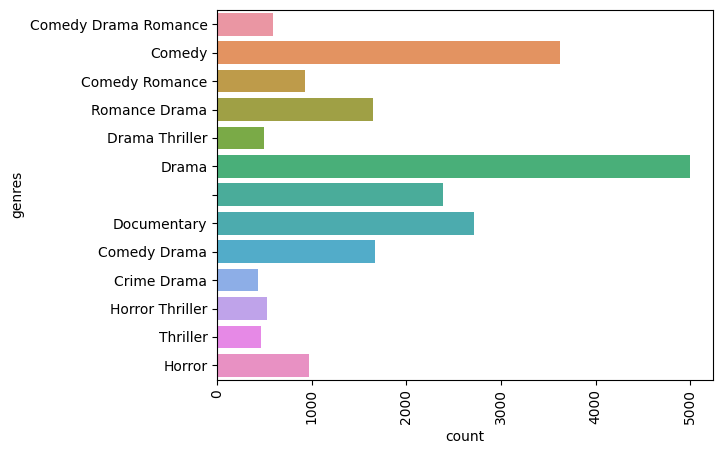

In [16]:
# Reemplazar los nombres de los géneros de Drama Romance por Romance Drama para que lo tome como 
# un solo genero y lo mismo tratamiento lo realizamos con Drama Comedy
df_peliculas['genres'] = df_peliculas['genres'].replace({'Drama Romance': 'Romance Drama'})
df_peliculas['genres'] = df_peliculas['genres'].replace({'Drama Comedy': 'Comedy Drama'})

# Contar el número de veces que aparece cada género
counts = df_peliculas['genres'].value_counts()

# Seleccionar solo los géneros más importantes
important_genres = counts[counts > 400]

# Filtrar los datos por los géneros más importantes
df_filtered = df_peliculas[df_peliculas['genres'].isin(important_genres.index)]

# Graficar los datos con seaborn
sns.countplot(y='genres', data=df_filtered)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En este gráfico podemos ver que el genero en el que más se realizaron peliculas es el Drama.Ya que cuenta con aproximadamente 5000 peliculas.
Y el genero Comedy se realizaron aproximadamente más de 3500 peliculas

Analizamos la columna 'production_companies'para lo cual vamos a realizar el conteo de variable. 

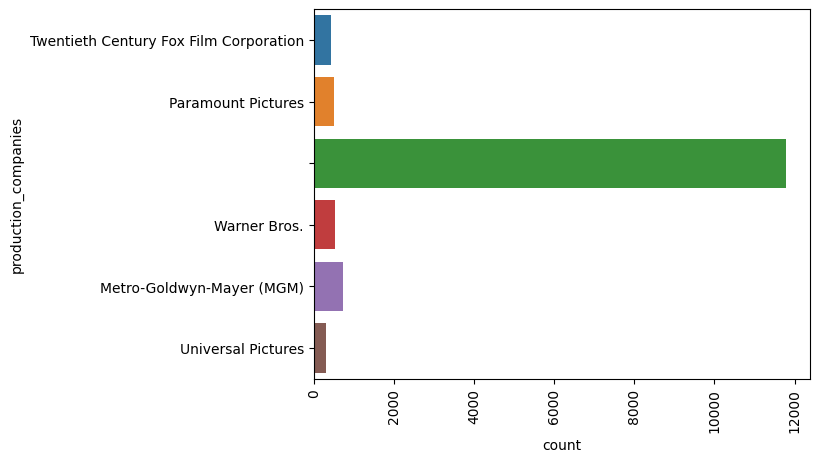

In [17]:
# Contar el número de veces que aparece cada production_companies
counts = df_peliculas['production_companies'].value_counts()

# Seleccionar solo las compañias productoras más importantes
important_production_companies = counts[counts>300]

# Filtrar los datos por las compañias más importantes
df_filtered1 = df_peliculas[df_peliculas['production_companies'].isin(important_production_companies.index)]

# Graficar los datos con seaborn
sns.countplot(y='production_companies', data=df_filtered1)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

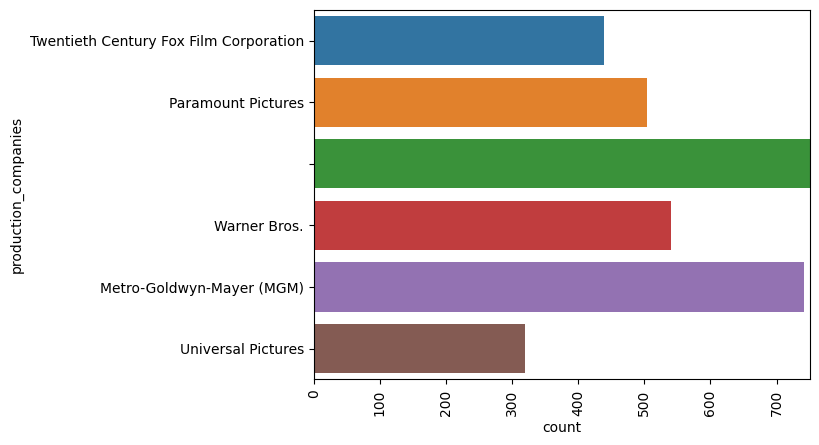

In [18]:
# Contar el número de veces que aparece cada production_companies
counts = df_peliculas['production_companies'].value_counts()

# Seleccionar solo las compañias productoras más importantes
important_production_companies = counts[counts>300]

#Limito el eje x
plt.xlim([0, 750])

# Filtrar los datos por las compañias más importantes
df_filtered1 = df_peliculas[df_peliculas['production_companies'].isin(important_production_companies.index)]

# Graficar los datos con seaborn
sns.countplot(y='production_companies', data=df_filtered1)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Estos graficos nos muestra que no se tiene datos de la compañia productora de 12000 peliculas y que la productora que mas realizo peliculas fue Metro-Goldwyn-Mayer(MGM). MGM produjo aproximadamente mas de 740 peliculas.

Analizaremos production_countries

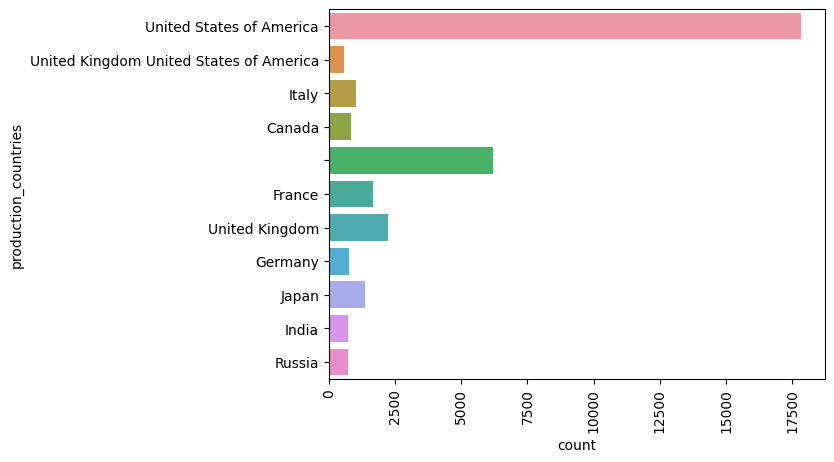

In [19]:
# Contar el número de veces que aparece cada production_countries
counts = df_peliculas['production_countries'].value_counts()

# Seleccionar solo los paises productoras de peliculas más importantes
important_production_countries = counts[counts>500]

# Filtrar los datos por los paises  más importantes
df_filtered2 = df_peliculas[df_peliculas['production_countries'].isin(important_production_countries.index)]

# Graficar los datos con seaborn
sns.countplot(y='production_countries', data=df_filtered2)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Limito el eje x para poder ver mejor los otros paises productores

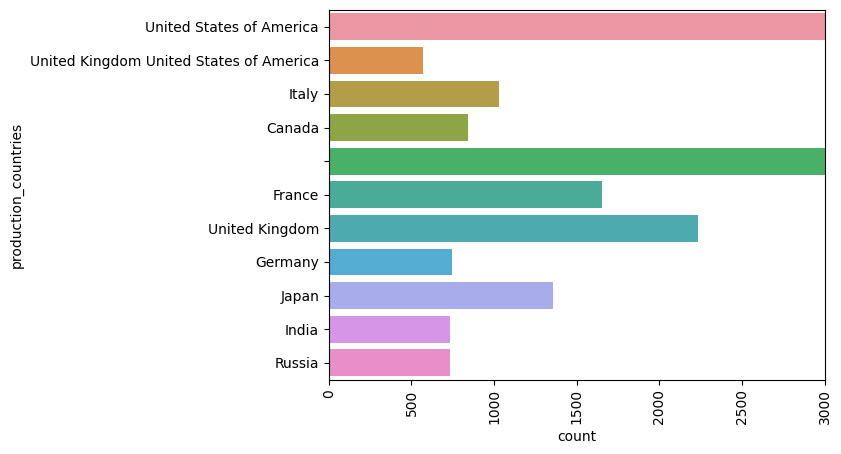

In [20]:
# Contar el número de veces que aparece cada production_countries
counts = df_peliculas['production_countries'].value_counts()

# Seleccionar solo los paises productoras de peliculas más importantes
important_production_countries = counts[counts>500]

#Limito el eje x
plt.xlim([0, 3000])

# Filtrar los datos por los paises  más importantes
df_filtered2 = df_peliculas[df_peliculas['production_countries'].isin(important_production_countries.index)]

# Graficar los datos con seaborn
sns.countplot(y='production_countries', data=df_filtered2)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Los graficos nos muestra que el pais que más peliculas produjo fue United States of America con más de 17500 pelicuas.
Analizamos que no se tiene datos del pais en donde se produjeron las peliculas para aproximadamente 6300 registros.
Y United kingdom produjo aproximadamente más de 2200 peliculas.

Analizaremos la columna original_language

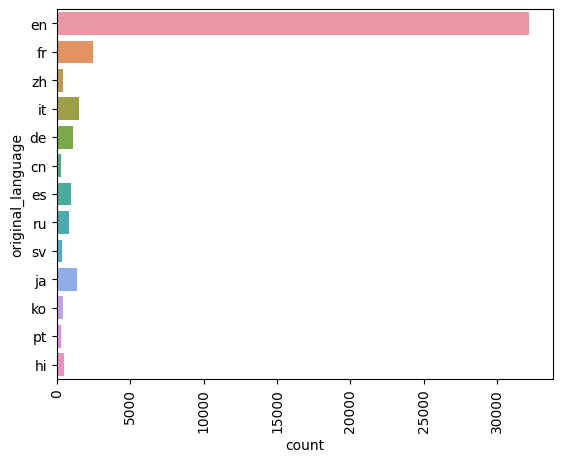

In [21]:
# Contar el número de veces que aparece cada idioma
counts = df_peliculas['original_language'].value_counts()

# Seleccionar solo los idiomas de peliculas más importantes
important_original_language = counts[counts>300]

# Filtrar los datos por idiomas  más importantes
df_filtered3 = df_peliculas[df_peliculas['original_language'].isin(important_original_language.index)]

# Graficar los datos con seaborn
sns.countplot(y='original_language', data=df_filtered3)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

El idioma en el que se produjo mas peliculas fue ingles. En ingles se produjeron más de 30.000 peliculas. Luego para ver mejor los otros idiomas voy a limitar el eje x

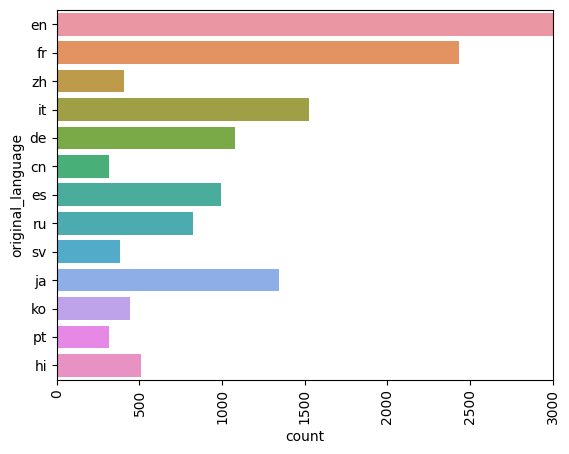

In [22]:
# Contar el número de veces que aparece cada idioma
counts = df_peliculas['original_language'].value_counts()

# Seleccionar solo los idiomas de peliculas más importantes
important_original_language = counts[counts>300]

#Limito el eje x
plt.xlim([0, 3000])

# Filtrar los datos por idiomas  más importantes
df_filtered3 = df_peliculas[df_peliculas['original_language'].isin(important_original_language.index)]

# Graficar los datos con seaborn
sns.countplot(y='original_language', data=df_filtered3)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Puedo analizar que en frances se produjeron alrededor de 2500 peliculas y en italiano se produjeron alrededor de 1500 peliculas.

Vamos a realizar el analisis de la columna status para lo cual realizaremos el conteo de variable de esta columna

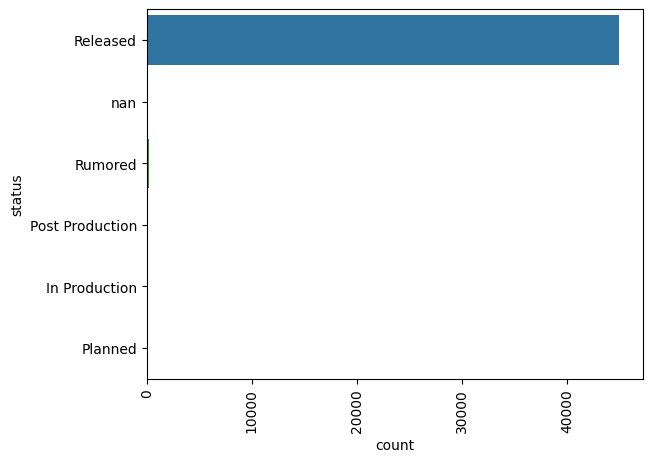

In [23]:
# Contar el número de veces que aparece cada status
counts = df_peliculas['status'].value_counts()

# Seleccionar solo los estados de peliculas más importantes
important_status = counts[counts>1]

# Filtrar los datos por idiomas  más importantes
df_filtered4 = df_peliculas[df_peliculas['status'].isin(important_status.index)]

# Graficar los datos con seaborn
sns.countplot(y='status', data=df_filtered4)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Released es el estado con más número de peliculas ya se encuentra mas de 40000 peliculas. Limito el eje x para ver mejor los otros estados

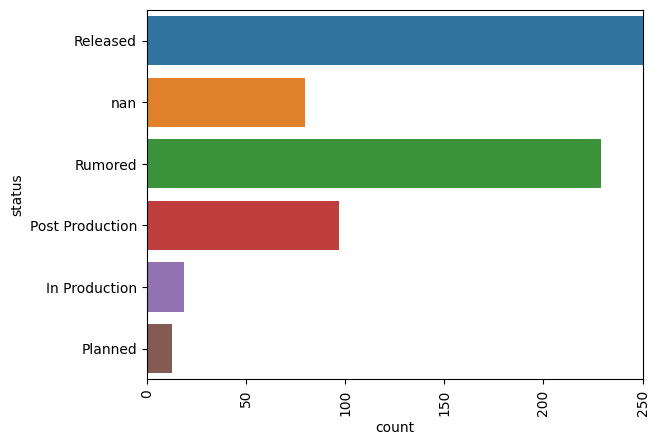

In [24]:
# Contar el número de veces que aparece cada status
counts = df_peliculas['status'].value_counts()

# Seleccionar solo los estados de peliculas más importantes
important_status = counts[counts>10]

#Limito el eje x
plt.xlim([0, 250])

# Filtrar los datos por idiomas  más importantes
df_filtered4 = df_peliculas[df_peliculas['status'].isin(important_status.index)]

# Graficar los datos con seaborn
sns.countplot(y='status', data=df_filtered4)

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En el estado Remored se encuentra aproximadamente más de 225 peliculas.Y aproximadamente mas 90 se encuentran en Post Production

In [ ]:
Vamos a realizar el analisis de las variables numericas

In [25]:
df_peliculas.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.534600e+04,45346.000000,45346.000000,4.534600e+04,45100.000000,45346.000000,45346.000000,45346.000000,45346.0
mean,4.232580e+06,108042.219645,2.926188,1.123366e+07,94.177805,5.624196,110.135293,1991.882834,inf
std,1.744373e+07,112187.326746,6.010970,6.440990e+07,38.348775,1.915339,491.899276,24.053040,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.0
25%,0.000000e+00,26390.250000,0.388732,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.0
50%,0.000000e+00,59852.500000,1.130176,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.0
75%,0.000000e+00,156601.500000,3.689337,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.0
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


En base a esto podemos analizar por ejemplo la columna popularity de 45346 peliculas, el promedio de la popularidad es 2.92 y la desviación estander es de 6.01. El valor minimo de la popularidad es cero y el valor maximo de popularidad es 547.48 .El 75% tiene una popularidad de 3.68. 
En el caso de la columna runtime se cuenta con 45100 datos. El promedio de la duración de las peliculas es de 94.17 minutos. La desviación estander es de 38.34.El valor minimo de duración es de 0 y el maximo es de 1256 minutos.El 75% tiene un valor de 6.8

Vamos a realizar histograma para ver mejor los datos

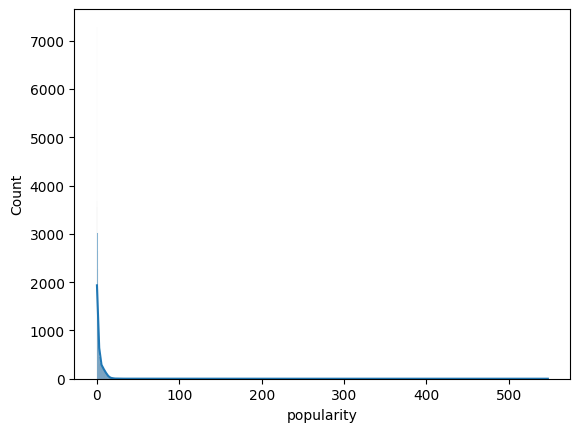

In [31]:
sns.histplot(data=df_peliculas, x="popularity", kde=True)
plt.show()

Este histograma detalla la frecuencia de popularidad

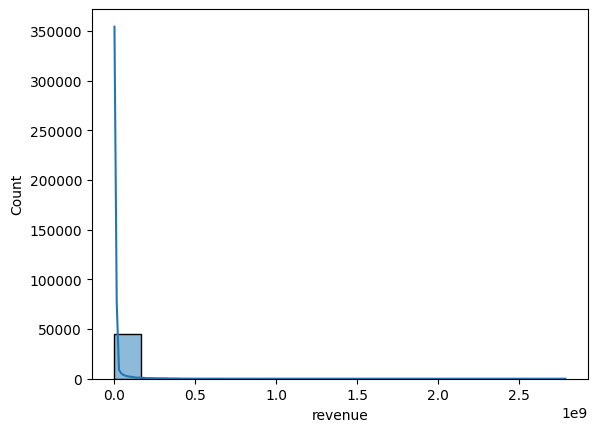

In [32]:
sns.histplot(data=df_peliculas, x="revenue", kde=True)
plt.show()

Este histograma muestra la frecuencia en la recaudación

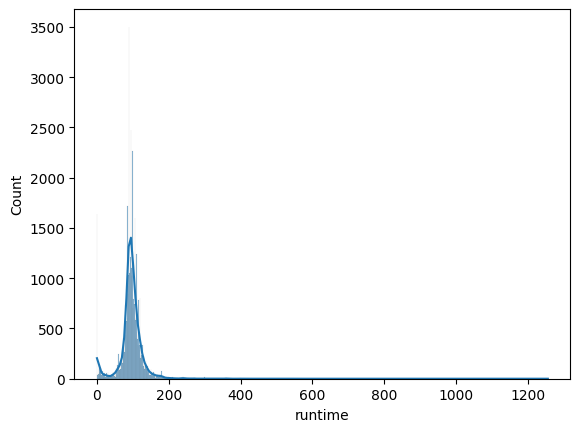

In [34]:
sns.histplot(data=df_peliculas, x="runtime", kde=True)
plt.show()

Este histograma muestra la frecuencia en la duración de peliculas

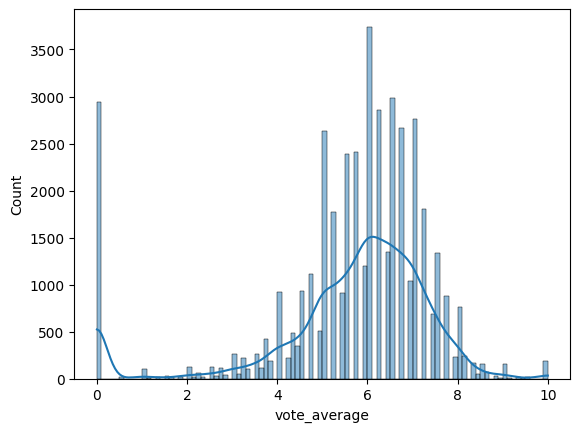

In [35]:
sns.histplot(data=df_peliculas, x="vote_average", kde=True)
plt.show()

Este histograma muestra la frecuencia en el puntaje promedio de las peliculas

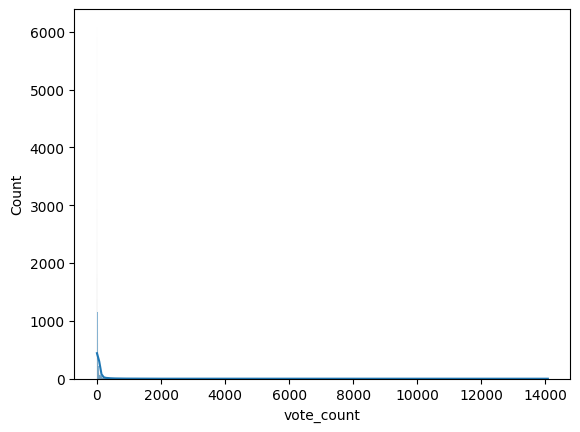

In [36]:
sns.histplot(data=df_peliculas, x="vote_count", kde=True)
plt.show()

Este histograma muestra la frecuencia en el numero de votos recibidos por peliculas

In [ ]:
Relacion entre variables

Exploro la relación entre variables como "popularity" y "vote_average" o "budget" y "revenue".


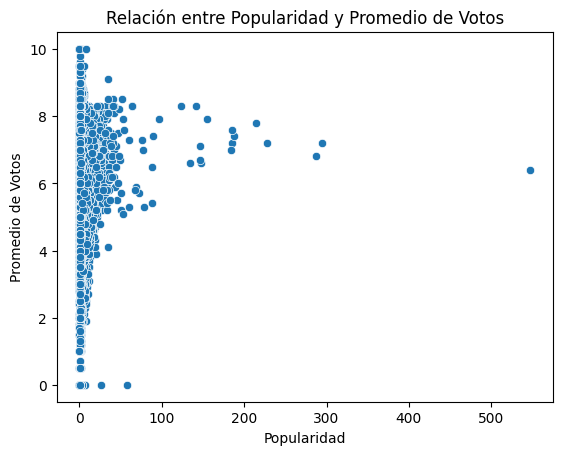

Correlación entre Popularidad y Promedio de Votos: 0.1537308572327053


In [39]:
# Gráfico de dispersión
sns.scatterplot(data=df_peliculas, x='popularity', y='vote_average')
plt.xlabel('Popularidad')
plt.ylabel('Promedio de Votos')
plt.title('Relación entre Popularidad y Promedio de Votos')
plt.show()

# Correlación
correlation = df_peliculas['popularity'].corr(df_peliculas['vote_average'])
print('Correlación entre Popularidad y Promedio de Votos:', correlation)

Mapa de calor

C:\Users\Andrea\AppData\Local\Temp\ipykernel_10932\326978794.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

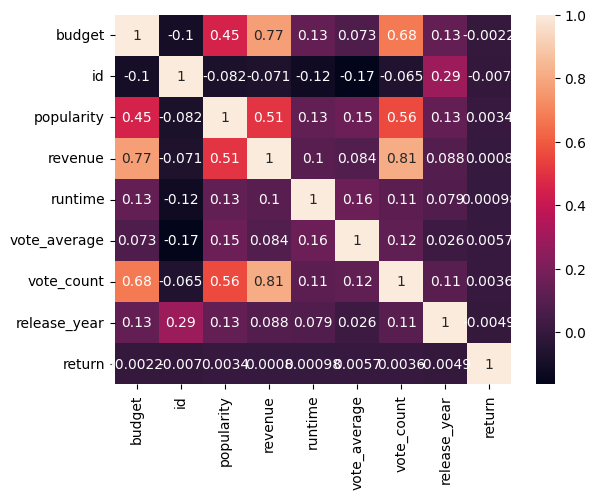

In [46]:
df = pd.read_csv('E:\Proyecto individual Henry\Data\peliculas.csv')
sns.heatmap(df.corr(), annot=True)

En este mapa de calor poder ver las correlacion entre las variables.
Por ejemplo la variable revenue (recaudacion de la pelicula) tiene una correlacion elevada con respecto a  la variable vote_count (numero de votos ) ya que es de 0.81.
El color negro muestra que el valor de la correlacion es cercano a cero. A medida que el color es mas claro se va aproximando a 1
